# Understanding the Data

# World Data Indicator Exploratory Data Analysis (EDA)

The World Data Indicator (WDI) data set has yet to be explored.  It is full of promise and curiosity to understand how the world data indicators are related in any way form or fashion.  From a data scientist point of view,  there is only one way to understand the data set.  This is, the data set is a gift that will remain a mystery until we unwrap it and do a thorough exploratory data analysis.


The WDI data set does **NOT** have the luxury of putting all of the data into one csv data file.   The WDI data set is composed of the following separate data sets:


* Country.csv
* CountryNotes.csv
* database.sqlite
* Footnotes.csv
* Indicators.csv
* Series.csv
* SeriesNotes.csv

Our goal is to create a global data frame which ties all of above data sets into one using Python's pandas libraries or SFrames.   This will later enable our team to easily explore and visualize the data set using simple Python programming techniques. 

Data is expensive and none of the initial data collected will be discarded.  Our team took the approach to analyze each data set and understand how the above data set's are related.  


In [21]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%matplotlib inline

In [3]:
# Path to where all of the data set files resides 
path = 'data'

# Data Understanding - Describe the meaning and type of data for each attribute in the data file

This data is spread across multiple discrete datasets.  The one dataset that is most useful for analysis is the Indicators.csv dataset as it includes values for all of the attributes, or indicators, that the WDI gathers.  All other datasets include metadata and descriptive Nominal attributes.  One such example of this is the Country.csv dataset.  This dataset includes 31 attributes.  These features include 6 that uniquely identify each country, while the rest of the features describe various financial, agricultural, health, and government metadata for each country in the dataset.  A brief description of these attributes are included below:  

## Country.csv Dataset
### ATTRIBUTE NAME - TYPE - MEANING
CountryCode - Nominal - A unique three letter code representing each country.  
ShortName - Nominal - A brief version of the country name.  
TableName - Nominal - Each countries name in a format appropriate for displaying in tables.  
LongName - Nominal - The full version of the name for each country.  
Alpha2Code - Nominal - A unique two letter code representing each country.  
CurrencyUnit - Nominal - The full name of the unit of currency used in each country.  
SpecialNotes - Nominal - Any miscellaneous notes that the researchers wanted to add to the country record, such as unusual fiscal year schedules that could impact one or more other attributes.  
Region - Nominal - The major geographical region that each country belongs to.  
IncomeGroup - Ordinal - A description of the income group for each country relative to others in the dataset.  
Wb2Code - Nominal - Another unique two letter code representing each country, similar to the Alpha2Code feature.  
NationalAccountsBaseYear - Integer - The base year used for calculating an index for the country's financial health.  
NationalAccountsReferenceYear - Integer - A reference year used for calculating an index for the country's financial health if for some reason they do not have or do not use a base year.  
SnaPriceValuation - Binary - A descriptive indicator of whether the country accounts for its financials by calculating Value Added at Basic Prices (VAB) or Value Added at Producer Prices (VAP).  
LendingCategory - Nominal - The category that each country has been classified as for the purposes of lending from the world bank.  These classifications are typically IDA, IBRD, or "Blend" for those countries both poor enough to borrow from the IDA but also creditworthy enough to borrow from the IBRD.  
OtherGroups - Nominal - A miscellaneous listing of any other major groups of nations that the country may fall under, such as "HIPC" for the Heavily Indebted Poor Countries.  
SystemOfNationalAccounts - Nominal - The system used by the country to manage national accounts.  
AlternativeConversionFactor - Integer - A conversion rate used by the World Bank when actual conversion rates are deemed inaccurate or inadequate for the needs of the data.   
PppSurveyYear - Integer - The most recent year in which Purchasing Power Parity, or PPP, was surveyed within the country.   
BalanceOfPaymentsManualInUse - Nominal - A brief description of the manual used by each country to manage its balance of payments.   
ExternalDebtReportingStatus - Nominal - How the country reports external debt, such as "actual" if they report the actual value of the external debt.    
SystemOfTrade - Binary - An indicator of whether each country uses a general system of trade or a special system of trade.  
GovernmentAccountingConcept - Nominal - A description of how each country handles their national finances, such as centralized budget versus non-centralized, etc.  
ImfDataDisseminationStandard - Nominal - Which global data dissemination standard the country adheres to, if any.  
LatestPopulationCensus - Integer - The year in which the most recent census of each country's population was administered.  
LatestHouseholdSurvey - Integer/Nominal - The year in which the most recent household survey was administered to the populace of each country, as well as a description of the type of survey performed.  
SourceOfMostRecentIncomeAndExpenditureData - Nominal/Integer - What survey produced the most recent income and expenditure data for each country, as well as the year in which that survey was administered.  
VitalRegistrationComplete - Binary - A Yes/No record of whether each country completed vital registration.  
LatestAgriculturalCensus - Integer - The year in which the most recent agricultural census was administered for each country.  
LatestIndustrialData - Integer - The year in which the most recent industrial data was gathered for each country.  
LatestTradeData - Integer - The year in which the latest trade data was gathered for each country.  
LatestWaterWithdrawalData - Integer - The year in which the latest water withdrawal data was gathered for each country.  
  
  
While this is helpful, the majority of our analysis will be performed on the Indicators.csv file, which includes the values of interest that are predominantly continuous or integer values.  One point of interest in this dataset is that each indicator is not given its own column in the data, rather there is one "IndicatorName" column that identifies the Indicator and the actual value for that Indicator, or Attribute, is given in a Value column.  This presented an interesting twist on the standard dataset layout which is accounted for in our code through the rest of this project.  I will detail the name, type, and meaning for the 6 Attributes or columns that are included in the indicators.csv dataset as it is currently constructed:  
  
## Indicators.csv Dataset  
### ATTRIBUTE NAME - TYPE - MEANING  
CountryName - Nominal - The full name for each country in the dataset.  
CountryCode - Nominal - A three letter code that uniquely identifies each country in the dataset.  
IndicatorName - Nominal - Includes the name and a brief description of the Indicator that this row's value relates to.
IndicatorCode - Nominal - A three letter coded that unique identifies each Indicator in the dataset.
Year - Integer - The year for which the Value was collected for the given Indicator.
Value - Varies, but usually Coninuous - The Value colleected in the given Year for the given Indicator.

# Country.csv

In [5]:
# now let's read in the same data using pandas to save it as a dataframe
filename = path + '\Country.csv'

df_country = pd.read_csv(filename) # read in the csv file
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 31 columns):
CountryCode                                   247 non-null object
ShortName                                     247 non-null object
TableName                                     247 non-null object
LongName                                      247 non-null object
Alpha2Code                                    244 non-null object
CurrencyUnit                                  214 non-null object
SpecialNotes                                  164 non-null object
Region                                        214 non-null object
IncomeGroup                                   214 non-null object
Wb2Code                                       246 non-null object
NationalAccountsBaseYear                      205 non-null object
NationalAccountsReferenceYear                 54 non-null object
SnaPriceValuation                             198 non-null object
LendingCategory                       

In [6]:
df_country.describe()

,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
count,113.000000,186.000000,180.000000
mean,2009.079646,2011.854839,2003.983333
std,2.560488,2.779345,4.938137
min,2001.000000,1995.000000,1975.000000
25%,2009.000000,2012.000000,2001.000000
50%,2010.000000,2013.000000,2005.000000
75%,2011.000000,2013.000000,2007.000000
max,2011.000000,2013.000000,2013.000000


In [18]:
pd.options.display.max_columns = None
df_country.head(6)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,1980,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1968 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010,2013,2001
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,2011 (household consumption only).,NaN,NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006,NaN
5,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,199196,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2014,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008/09",NaN,2015,NaN,NaN,2005


# CountryNotes.csv 

In [ ]:
# TO DO
# EXPLAIN EACH FEATURE IN LIST
# FEATURE NAME       DESCRIPTION
# CountryCode        unique country code
# SeriesCode
# Description
# LatestWaterWithdrawalData

In [6]:
# now let's read in the same data using pandas to save it as a dataframe
filename = path + '\CountryNotes.csv'

df_country_notes = pd.read_csv(filename) # read in the csv file
df_country_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857 entries, 0 to 4856
Data columns (total 3 columns):
Countrycode    4857 non-null object
Seriescode     4857 non-null object
Description    4857 non-null object
dtypes: object(3)
memory usage: 113.9+ KB


In [19]:
df_country_notes.describe()

,Countrycode,Seriescode,Description
count,4857,4857,4857
unique,215,259,433
top,ARG,SP.POP.GROW,Data sources : United Nations World Population...
freq,111,214,998


In [7]:
df_country_notes.head()

,Countrycode,Seriescode,Description
0,ABW,EG.EGY.PRIM.PP.KD,Sources: Estimated based on UN Energy Statisti...
1,ABW,EG.ELC.RNEW.ZS,Sources: UN Energy Statistics (2014)
2,ABW,EG.FEC.RNEW.ZS,Sources: UN Energy Statistics (2014)
3,ABW,SM.POP.NETM,Data sources : United Nations World Population...
4,ABW,SM.POP.TOTL,Estimates are derived from data on foreign-bor...


# database.sqlite

In [ ]:
# TO DO
# EXPLAIN EACH FEATURE IN LIST
# FEATURE NAME       DESCRIPTION
# CountryName        unique country name
# CountryCode        unique country code
# IndicatorName
# IndicatorCode
# Year
# Value

In [16]:
# now let's read in the same data using sql to save it as a dataframe
database = path + '\database.sqlite'
con = sqlite3.connect(database) # again this file is in the same directory
df_database_indicators = pd.read_sql('SELECT * FROM Indicators', con)  # the table name is Indicators
df_database_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [20]:
df_database_indicators.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [17]:
df_database_indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


# Footnotes.csv

In [ ]:
# TO DO
# EXPLAIN EACH FEATURE IN LIST
# FEATURE NAME       DESCRIPTION
# CountryName        unique country name
# SeriesCode         unique series code
# Year
# Descripton

In [32]:
# now let's read in the same data using pandas to save it as a dataframe
# Indicators.csv
filename = path + '\Footnotes.csv'
df_footnotes = pd.read_csv(filename) # read in the csv file
df_footnotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532415 entries, 0 to 532414
Data columns (total 4 columns):
Countrycode    532415 non-null object
Seriescode     532415 non-null object
Year           532415 non-null object
Description    532415 non-null object
dtypes: object(4)
memory usage: 16.2+ MB


In [33]:
df_footnotes.describe()

,Countrycode,Seriescode,Year,Description
count,532415,532415,532415,532415
unique,278,653,77,85052
top,LIC,SP.DYN.IMRT.IN,YR2010,UNESCO Institute for Statistics (UIS) estimate
freq,4074,10170,24179,59009


# Indicators.csv

In [ ]:
# TO DO
# EXPLAIN EACH FEATURE IN LIST
# FEATURE NAME       DESCRIPTION
# CountryName        unique country name
# CountryCode        unique country code
# IndicatorName
# IndicatorCode
# Year
# Value

In [4]:
# now let's read in the same data using pandas to save it as a dataframe
# Indicators.csv
filename = path + '\Indicators.csv'
df_indicators = pd.read_csv(filename) # read in the csv file
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 302.1+ MB


In [22]:
df_indicators.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [23]:
df_indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [6]:
# now let's read in the same data using pandas to save it as a dataframe
# Indicators.csv
filename = path + '\Indicators.csv'

df_indicators = pd.read_csv(filename) # read in the csv file
df_indicators.head()
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 302.1+ MB


In [16]:
ind = ['Year','CountryCode','CountryName']
code = 'IndicatorName'
val = 'Value'
df_indicators.pivot(index=ind, columns=code, values=val)

ValueError: Wrong number of items passed 5656458, placement implies 3

# Series.csv

In [ ]:
# TO DO
# EXPLAIN EACH FEATURE IN LIST
# FEATURE NAME       DESCRIPTION
# SeriesCode         
# Topic
# ShortDefinition
# ....
# ....
# LicenseType

In [26]:
# now let's read in the same data using pandas to save it as a dataframe
# Series.csv
filename = path + '\Series.csv'
df_series = pd.read_csv(filename) # read in the csv file
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 20 columns):
SeriesCode                          1345 non-null object
Topic                               1345 non-null object
IndicatorName                       1345 non-null object
ShortDefinition                     118 non-null object
LongDefinition                      1345 non-null object
UnitOfMeasure                       7 non-null object
Periodicity                         1345 non-null object
BasePeriod                          77 non-null object
OtherNotes                          0 non-null float64
AggregationMethod                   1058 non-null object
LimitationsAndExceptions            711 non-null object
NotesFromOriginalSource             38 non-null object
GeneralComments                     281 non-null object
Source                              1345 non-null object
StatisticalConceptAndMethodology    773 non-null object
DevelopmentRelevance                575 non-null ob

In [27]:
df_series.describe()

,OtherNotes,OtherWebLinks,RelatedIndicators
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [7]:
df_series.head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",NaN,Foreign direct investment refers to direct inv...,NaN,Annual,NaN,NaN,Sum,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",NaN,NaN,NaN,NaN,NaN,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",NaN,Net capital account records acquisitions and d...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open


# SeriesNotes.csv

In [ ]:
# TO DO
# EXPLAIN EACH FEATURE IN LIST
# FEATURE NAME       DESCRIPTION
# SeriesCode         
# Year
# Description

In [5]:
# now let's read in the same data using pandas to save it as a dataframe
# SeriesNotes.csv
filename = path + '\SeriesNotes.csv'
df_series_notes = pd.read_csv(filename) # read in the csv file
df_series_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
Seriescode     369 non-null object
Year           369 non-null object
Description    369 non-null object
dtypes: object(3)
memory usage: 8.7+ KB


In [7]:
df_series_notes.head()

,Seriescode,Year,Description
0,SP.ADO.TFRT,YR1960,Interpolated using data for 1957 and 1962.
1,SP.DYN.AMRT.FE,YR1960,"Interpolated using data for 1957 and 1962, if ..."
2,SP.DYN.AMRT.MA,YR1960,"Interpolated using data for 1957 and 1962, if ..."
3,SP.DYN.TO65.FE.ZS,YR1960,Interpolated using data for 1957 and 1962.
4,SP.DYN.TO65.MA.ZS,YR1960,Interpolated using data for 1957 and 1962.


In [30]:
df_series_notes.describe()

,Seriescode,Year,Description
count,369,369,369
unique,25,55,68
top,SP.ADO.TFRT,YR2007,The sample was drawn from the manufacturing se...
freq,55,20,72


In [31]:
df_series_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
Seriescode     369 non-null object
Year           369 non-null object
Description    369 non-null object
dtypes: object(3)
memory usage: 8.7+ KB


# TO DO
# Build Global DataFrame


# Visualization of the Most Important Attributes

While our dataset includes We are most interested in comparing attributes between the three major countries of the US, Russia, and China.  As such we will filter the data for these countries and compare some of the attributes we find.  Specifically, the five attributes we chose as most important and interesting are as follows:  
  
1. Adolescent Birth Rate, which is the number of births per thousand population where the mother is between age 15 and 19.
2. GDP, which is the total Gross Domestic Product given in current US Dollars.
3. GDP Per Capita, which is the total GDP divided by the population of the country.
4. The number of women that participate in government, represented as a percentage of total parliamentary or legislative seats held by women. 
5. The Labor Force Participation Rate, which is a measurement of what percent of the population that are of the age to participate in the labor force actually do.

### Adolescent Birth Rate Visualization

In [10]:
# This code takes the df_indicators frame and creates three new filtered dataframes, one each for the US, China, and Russia.

df_us = df_indicators[df_indicators['CountryCode'] == 'USA']
df_rus = df_indicators[df_indicators['CountryCode'] == 'RUS']
df_chi = df_indicators[df_indicators['CountryName'] == 'China']

In [11]:
# This code concatenates the three filtered frames into a "df_3" frame that includes all three countries of interest and no others.
# We then choose one attribute of interest, the adolescent birth rate (births per 1000 population where the mother is between 15-19 years old) and
# create filtered frames for that particular attribute.

frames = [df_us, df_rus, df_chi]
df_3 = pd.concat(frames)
df_3[df_3['IndicatorCode']=='SP.ADO.TFRT']

df_3_abr = df_3[df_3['IndicatorCode']=='SP.ADO.TFRT']
df_us_abr = df_us[df_us['IndicatorCode']=='SP.ADO.TFRT']
df_rus_abr = df_rus[df_rus['IndicatorCode']=='SP.ADO.TFRT']
df_chi_abr = df_chi[df_chi['IndicatorCode']=='SP.ADO.TFRT']

Visualizing the Adolescent Birth Rate for the US, Russia, and China


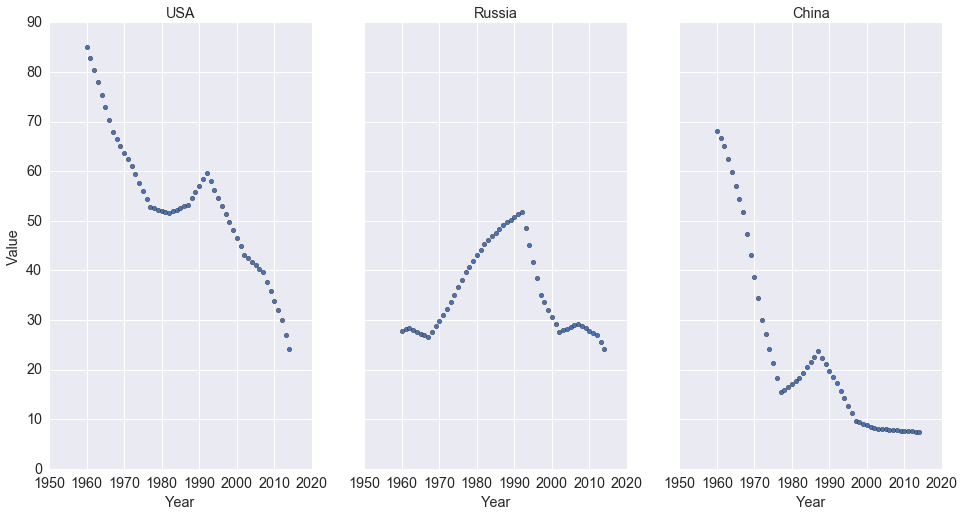

In [22]:
# This section of code builds upon Justin Markham and Brandon M Burrough's "Introduction to Linear Regression" notebook found here: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
# It creates three scatter plots that can easily compare between the three countries of interest. In many cases these scatter plots form a distinguishable line such that no regression line needs to be added.

print("Visualizing the Adolescent Birth Rate for the US, Russia, and China")
fig, ax = plt.subplots(1, 3, sharey=True)
df_us_abr.plot(kind='scatter', x='Year', y='Value', ax=ax[0], figsize=(16, 8), title='USA')
df_rus_abr.plot(kind='scatter', x='Year', y='Value', ax=ax[1], title='Russia')
df_chi_abr.plot(kind='scatter', x='Year', y='Value', ax=ax[2], title='China')


### Analysis of the Adolescent Birth Rate Visualization
As seen above, both the US and China seem to have similar trajectories, where their earliest recorded datapoint is their highest.  This means both started in 1960 with comparitively high adolescent birth rates, about 85 and 70 births per thousand population respectively.  Both countries see a sharp downward trend until about 1975, where they begin trending upwards until finally they both drop again either shortly before or shortly after 1990.  After that the only major difference observed is that China appears to have plateaued off at a low of around 8 births per thousand, while the US continues a sharp downard trend.  
Meanwhile, Russia is noticeably different from both the US and China.  Russia starts 1960 being much lower than the others, at only 30 births per thousand, then has a longer and more steady upward trend from 1968 to 1992, where it sharply drops back to the norm of 30 births per thousand and stays there.  
Based on this data it seems that in the early nineties there was some global event that caused a drop in adolescent births, though what exactly that event might be remains unclear.

### Gross Domestic Product (GDP) Visualization

In [23]:
df_3_gdp = df_3[df_3['IndicatorCode']=='NY.GDP.MKTP.CD']
df_us_gdp = df_us[df_us['IndicatorCode']=='NY.GDP.MKTP.CD']
df_rus_gdp = df_rus[df_rus['IndicatorCode']=='NY.GDP.MKTP.CD']
df_chi_gdp = df_chi[df_chi['IndicatorCode']=='NY.GDP.MKTP.CD']

Visualizing the Adolescent Birth Rate for the US, Russia, and China


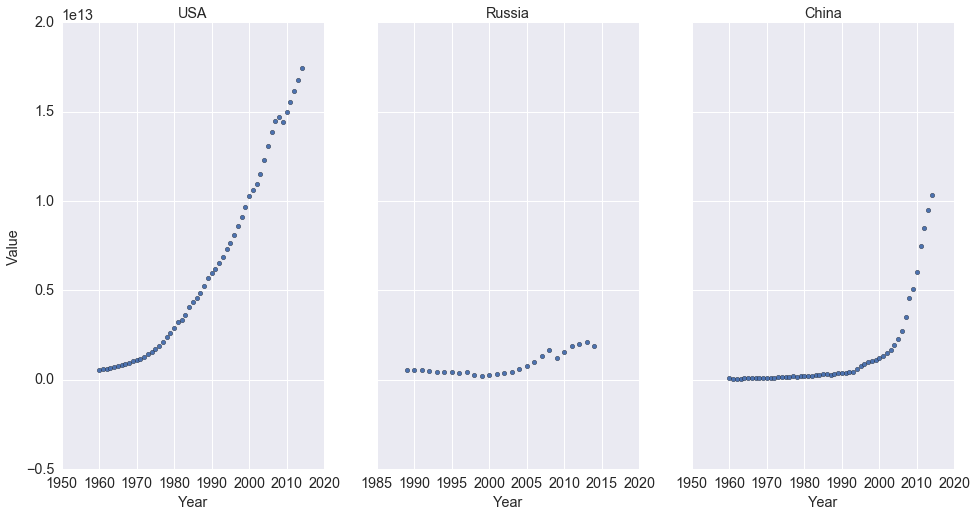

In [24]:
print("Visualizing Gross Domestic Product (GDP) for the US, Russia, and China")
fig, ax = plt.subplots(1, 3, sharey=True)
df_us_gdp.plot(kind='scatter', x='Year', y='Value', ax=ax[0], figsize=(16, 8), title='USA')
df_rus_gdp.plot(kind='scatter', x='Year', y='Value', ax=ax[1], title='Russia')
df_chi_gdp.plot(kind='scatter', x='Year', y='Value', ax=ax[2], title='China')

### Analysis of the Gross Domestic Product (GDP) Visualization  
The US is clearly different from both other countries, enjoying an upward trend that saw them grow from 543 Billion (0.0543e+13) Current US Dollars in 1960 to over 17.4 Trillion (1.74e+13) in 2014.  The growth was always upward, but hit an obvious inflection point around 1975 where the growth accelerated to a rapid rate that continued to climb aside from a slight blip near the onset of the 2008 housing crisis.  
While we do not have data for Russia prior to 1989, the data we do have tells a completely different story from the US.  Russia actually was in a slight downward trend until it shuffled into a slight upward trend around the turn of the millenium.  Even so, the upward movement stalled around 2007 and has yet to really recover, still hovering around 2 Trillion USD.  
China appears to be a combination of the other two countries, where it starts off with decades of little to no growth, begins expanding in the early nineties, then explodes into a growth rate as strong or stronger than the US in the mid-2000's.  In fact, China's GDP doubled from 5.06 Trillion USD in 2009 (0.506e+13) to 10.4 Trillion USD in 2014 (1.04e+13).


### GDP Per Capita Visualization

In [32]:
df_3_gdpc = df_3[df_3['IndicatorCode']=='NY.GDP.PCAP.CD']
df_us_gdpc = df_us[df_us['IndicatorCode']=='NY.GDP.PCAP.CD']
df_rus_gdpc = df_rus[df_rus['IndicatorCode']=='NY.GDP.PCAP.CD']
df_chi_gdpc = df_chi[df_chi['IndicatorCode']=='NY.GDP.PCAP.CD']

Visualizing Gross Domestic Product (GDP) Per Capita for the US, Russia, and China


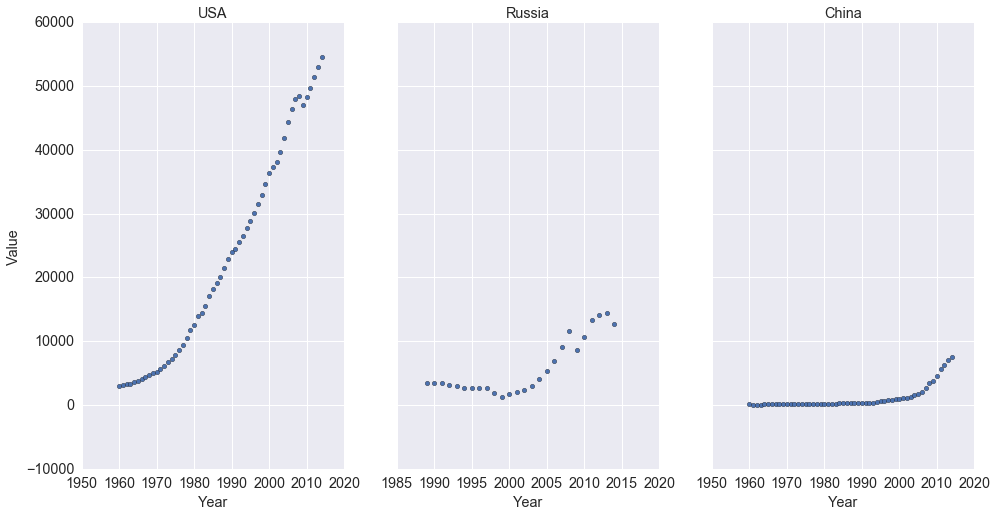

In [33]:
print("Visualizing Gross Domestic Product (GDP) Per Capita for the US, Russia, and China")
fig, ax = plt.subplots(1, 3, sharey=True)
df_us_gdpc.plot(kind='scatter', x='Year', y='Value', ax=ax[0], figsize=(16, 8), title='USA')
df_rus_gdpc.plot(kind='scatter', x='Year', y='Value', ax=ax[1], title='Russia')
df_chi_gdpc.plot(kind='scatter', x='Year', y='Value', ax=ax[2], title='China')

### Analysis of the GDP Per Capita Visualization  
For the US, the slope of the GDP Per Capita seems to match that of the total GDP, suggesting that all of the economic growth seen during that time kept pace with the country's population. The latest recorded GDP per captita in the US, $54,629 per person, is over four times the current value for Russia ($12,735 per person), and over seven times the current value for China ($7,590 per person).  
Russia's trend for GDP per capita also seems to match its trend for total GDP, and if anything the per capita has grown slightly more than the total.  China's GDP per capita, however, seems to be much flatter than the total GDP right up until the country enjoyed its second, more pronounced change in growth rate in the mid-2000's.  This could suggest that only very strong economic growth could measurably increase GDP per capita when your country has a very large population like China's.


### Percentage of Government Seats Held By Women Visualization

In [37]:
df_3_wip = df_3[df_3['IndicatorCode']=='SG.GEN.PARL.ZS']
df_us_wip = df_us[df_us['IndicatorCode']=='SG.GEN.PARL.ZS']
df_rus_wip = df_rus[df_rus['IndicatorCode']=='SG.GEN.PARL.ZS']
df_chi_wip = df_chi[df_chi['IndicatorCode']=='SG.GEN.PARL.ZS']

Visualizing The Percentage of Government Positions Held By Women for the US, Russia, and China


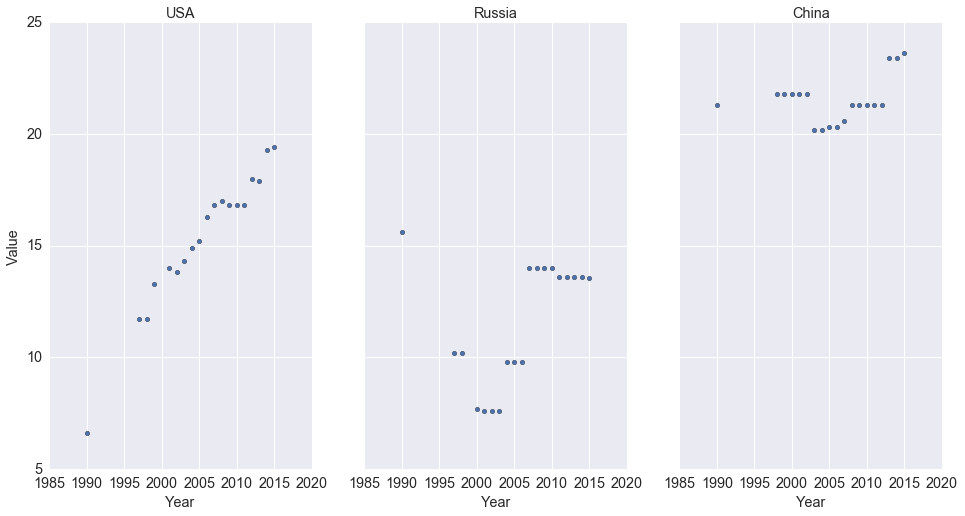

In [41]:
print("Visualizing The Percentage of Government Positions Held By Women for the US, Russia, and China")
fig, ax = plt.subplots(1, 3, sharey=True)
df_us_wip.plot(kind='scatter', x='Year', y='Value', ax=ax[0], figsize=(16, 8), title='USA')
df_rus_wip.plot(kind='scatter', x='Year', y='Value', ax=ax[1], title='Russia')
df_chi_wip.plot(kind='scatter', x='Year', y='Value', ax=ax[2], title='China')

### Analysis of the Percentage of Government Seats Held By Women Visualization  
None of these countries seem to have gathered data between 1990 and 1996, and the earliest datapoint is from 1990 so this attribute is relatively recent.  This causes the lone datapoint 1990 to appear to be an outlier.  This does not seem to pose much of an issue for China, where the value in 1990 matches the general 20-25% participation rate that it has always had.  It does not appear to be of much concern for the US either, as even though it is far lower than any other values it does stay along the linear trend of of the growth.  Russia, however, sees this outlier as being higher than any other point and not clearly part of a simple linear trend (more of a quadratic U-shaped trend).  
Keeping that in mind, the US has a steady upward trend of growth from around 7 percent participation in 1990 to nearly 20 percent participation in 2015.  This is higher than Russia, which aside from the lone 1990 datapoint has never risen higher than 14 percent participation and seems to be steady or dropping rather than rising based on the most recent trends.  China, however, has gone slightly up and down but has never dropped below 20 percent participation.

### Labor Force Participation Rate Visualization

In [42]:
df_3_lfp = df_3[df_3['IndicatorCode']=='SL.TLF.CACT.MA.ZS']
df_us_lfp = df_us[df_us['IndicatorCode']=='SL.TLF.CACT.MA.ZS']
df_rus_lfp = df_rus[df_rus['IndicatorCode']=='SL.TLF.CACT.MA.ZS']
df_chi_lfp = df_chi[df_chi['IndicatorCode']=='SL.TLF.CACT.MA.ZS']

Visualizing The Labor Force Participation Rate for the US, Russia, and China


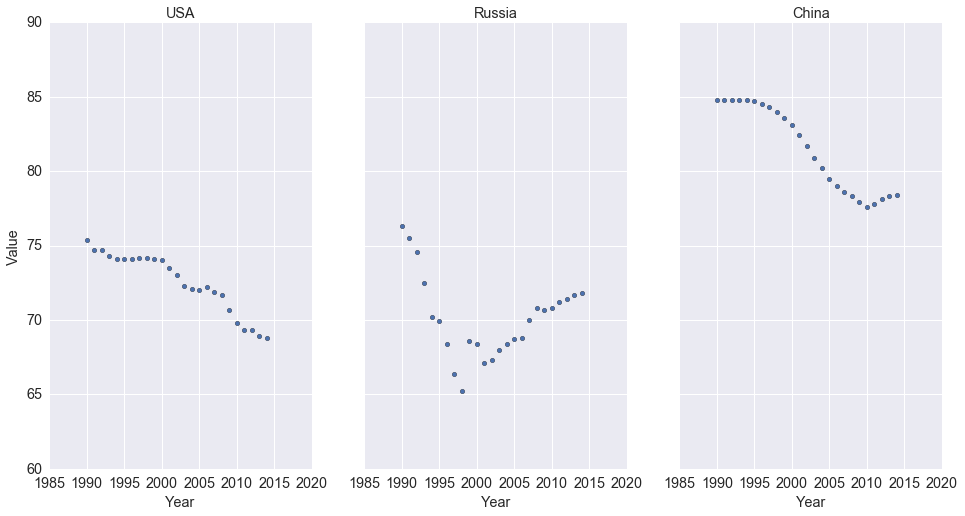

In [43]:
print("Visualizing The Labor Force Participation Rate for the US, Russia, and China")
fig, ax = plt.subplots(1, 3, sharey=True)
df_us_lfp.plot(kind='scatter', x='Year', y='Value', ax=ax[0], figsize=(16, 8), title='USA')
df_rus_lfp.plot(kind='scatter', x='Year', y='Value', ax=ax[1], title='Russia')
df_chi_lfp.plot(kind='scatter', x='Year', y='Value', ax=ax[2], title='China')

### Analysis of the Labor Force Participation Rate Visualization  
The US shows a steady rate between 1990 and 2000, before dropping to a pleateau of 72.5% in 2003, and dropping a second time in 2009 to about 69% where it rests today.  
Russia shows the sharpest decline from 1990 to 1998, after which it rebounded and showed steady growth since then.  As a country it started at a high of about 76% participation, fell to a low of about 65%, and currently sits at about 72%.  
China shows far and away the highest labor force participation rate for all times observed.  It stayed stable at nearly 85% participation before beginning a slow decline in the late nineties that saw it drop to a low of 77.5%, which it has since slightly recovered from.  China's current labor force participation rate is close to 78%.


# TO DO  
# Simple Statistics Section

Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.


# TO DO  
# Analyze the relationship between the important attributes

### Ones that seem interesting might include the following:
1. Comparing GDP with GDP per Capita
2. Comparing Adolescent Birth Rate with Women holding seats in government
3. Comparing labor force participation rate with GDP
4. Comparing labor force participation rate with GDP Per Capita
5. Comparing Adolescent Birth Rate with GDP

# TO DO

# Identify and Deal with Missing Values  

### One Idea: We had some missing values between 1990 and 1996 for the percentage of women in government data.  I spoke a bit about it in the visualization but it could certainly be expanded upon.

# TO DO

# Use Imputation to Deal with Missing Values 

# Why Imputation 

We are working on large data set where the data are expensive and we have many attributes/features. We can not afford to throw data out.  This could have many side effects and may cause our final analysis to be biased and incorrect. 

As a consensus, our team decided to use the normalized imputation method to determine how to fill in the missing data.  The easiset way to impute the missing data is to fill in the missing entries using the method taught in class.

* df_normalized = (df_sub-df_sub.min())/(df_sub.max()-df_sub.min())
* handle missing Categorical and Continuous feature variables.

# TO DO 
At a high level, we need to determine what is our hypothesis or what are we trying to test at HIGH LEVEL.

If this is not decided early on, we will be all over the place. This will make us look like we are confused by not taking a stand once our EDA analysis is completed. This will make it easier to complete the project 1 assignment.

Our report has to be on target, where we can explain in layman's terms the problem to upper management of our findings.  Upper management will not be impressed by what we have done, but have we identified and provided a solution to the problem in simple terminology.  